#### Created by Kavindu Hapuarachchi

In [1]:
import os
os.chdir('E:\MBA\Sem III\BA4005\Task 2')

#### read yield data to dataframe

In [2]:
import pandas as pd 
y_df=pd.read_excel('india coconut yield.xlsx')
y_df.head()

,Year,Area('000 ha),Production(Million nuts),Productivity(Nuts per ha)
0,1950-51,626.5,3281.7,5238
1,1951-52,630.2,3306.4,5247
2,1952-53,627.2,4177.1,6660
3,1953-54,638.7,3910.5,6123
4,1954-55,640.0,4264.6,6663


In [3]:
y_df.shape

(70, 4)

In [4]:
y_df.dtypes

Year                          object
Area('000 ha)                float64
Production(Million nuts)     float64
Productivity(Nuts per ha)      int64
dtype: object

#### read other predictor variables to dataframe

In [5]:
rf_df=pd.read_excel('rf.xlsx')
rf_df.head()


,Category,Annual Mean,5-yr smooth
0,1901,952.79,985.27
1,1902,999.69,990.53
2,1903,1121.12,995.97
3,1904,934.47,1001.79
4,1905,915.86,1008.17


In [6]:
rf_df.shape

(120, 3)

In [7]:
rf_df.dtypes

Category         int64
Annual Mean    float64
5-yr smooth    float64
dtype: object

In [8]:
tmp_df=pd.read_excel('mean_temp.xlsx')
tmp_df.head()

,Category,Annual Mean,5-yr smooth
0,1901,24.26,24.38
1,1902,24.52,24.25
2,1903,23.96,24.13
3,1904,24.02,24.03
4,1905,23.87,23.96


In [9]:
tmp_df.shape

(120, 3)

In [10]:
tmp_df.dtypes

Category         int64
Annual Mean    float64
5-yr smooth    float64
dtype: object

### check for missing values

In [11]:
y_df[y_df['Production(Million nuts)'].isnull()]

,Year,Area('000 ha),Production(Million nuts),Productivity(Nuts per ha)


In [12]:
rf_df[rf_df['Annual Mean'].isnull()]

,Category,Annual Mean,5-yr smooth


In [13]:
tmp_df[tmp_df['Annual Mean'].isnull()]

,Category,Annual Mean,5-yr smooth


### feature extraction

first create year variable for yield

In [14]:
y_df['Year']=y_df['Year'].str[:4]

In [15]:
y_df['Year']=y_df.Year.astype(float)

create lag variables for yield

In [16]:
y_df.columns

Index(['Year', 'Area('000 ha)', 'Production(Million nuts)',
       'Productivity(Nuts per ha)'],
      dtype='object')

In [17]:
y_df=y_df.rename(columns={'Production(Million nuts)':'yield'})

In [18]:
y_df['yield'].shift(1)

0          NaN
1      3281.70
2      3306.40
3      4177.10
4      3910.50
        ...   
65    20439.60
66    22167.45
67    23904.10
68    23798.23
69    21288.24
Name: yield, Length: 70, dtype: float64

In [19]:
y_df['yield_1'] = y_df['yield'].shift(1)
y_df['yield_2'] = y_df['yield'].shift(2)
y_df['yield_3'] = y_df['yield'].shift(3)
y_df['yield_4'] = y_df['yield'].shift(4)
y_df['yield_5'] = y_df['yield'].shift(5)


In [20]:
y_df

,Year,Area('000 ha),yield,Productivity(Nuts per ha),yield_1,yield_2,yield_3,yield_4,yield_5
0,1950.0,626.50,3281.70,5238,NaN,NaN,NaN,NaN,NaN
1,1951.0,630.20,3306.40,5247,3281.70,NaN,NaN,NaN,NaN
2,1952.0,627.20,4177.10,6660,3306.40,3281.70,NaN,NaN,NaN
3,1953.0,638.70,3910.50,6123,4177.10,3306.40,3281.70,NaN,NaN
4,1954.0,640.00,4264.60,6663,3910.50,4177.10,3306.40,3281.70,NaN
...,...,...,...,...,...,...,...,...,...
65,2015.0,2088.47,22167.45,10614,20439.60,21665.19,22680.03,23351.22,16942.92
66,2016.0,2082.11,23904.10,11481,22167.45,20439.60,21665.19,22680.03,23351.22
67,2017.0,2096.72,23798.23,11350,23904.10,22167.45,20439.60,21665.19,22680.03
68,2018.0,2150.89,21288.24,9897,23798.23,23904.10,22167.45,20439.60,21665.19


In [21]:
y_df=y_df.drop(columns=["Area('000 ha)",'Productivity(Nuts per ha)'])

create lag variables for rf & temp

In [22]:
rf_df=rf_df.rename(columns={'Annual Mean':'rf','Category':'Year'})

In [23]:
rf_df['rf_1'] = rf_df['rf'].shift(1)
rf_df['rf_2'] = rf_df['rf'].shift(2)
rf_df['rf_3'] = rf_df['rf'].shift(3)
rf_df['rf_4'] = rf_df['rf'].shift(4)
rf_df['rf_5'] = rf_df['rf'].shift(5)


In [24]:
rf_df=rf_df.drop(columns=['5-yr smooth'])

In [25]:
rf_df

,Year,rf,rf_1,rf_2,rf_3,rf_4,rf_5
0,1901,952.79,NaN,NaN,NaN,NaN,NaN
1,1902,999.69,952.79,NaN,NaN,NaN,NaN
2,1903,1121.12,999.69,952.79,NaN,NaN,NaN
3,1904,934.47,1121.12,999.69,952.79,NaN,NaN
4,1905,915.86,934.47,1121.12,999.69,952.79,NaN
...,...,...,...,...,...,...,...
115,2016,1065.11,1085.10,999.89,1196.86,1018.89,1089.24
116,2017,1108.30,1065.11,1085.10,999.89,1196.86,1018.89
117,2018,974.76,1108.30,1065.11,1085.10,999.89,1196.86
118,2019,1244.56,974.76,1108.30,1065.11,1085.10,999.89


In [26]:
tmp_df=tmp_df.rename(columns={'Annual Mean':'tmp','Category':'Year'})

In [27]:
tmp_df['tmp_1'] = tmp_df['tmp'].shift(1)
tmp_df['tmp_2'] = tmp_df['tmp'].shift(2)
tmp_df['tmp_3'] = tmp_df['tmp'].shift(3)
tmp_df['tmp_4'] = tmp_df['tmp'].shift(4)
tmp_df['tmp_5'] = tmp_df['tmp'].shift(5)

In [28]:
tmp_df=tmp_df.drop(columns=['5-yr smooth'])

In [29]:
tmp_df

,Year,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
0,1901,24.26,NaN,NaN,NaN,NaN,NaN
1,1902,24.52,24.26,NaN,NaN,NaN,NaN
2,1903,23.96,24.52,24.26,NaN,NaN,NaN
3,1904,24.02,23.96,24.52,24.26,NaN,NaN
4,1905,23.87,24.02,23.96,24.52,24.26,NaN
...,...,...,...,...,...,...,...
115,2016,25.27,24.89,24.77,24.64,24.77,24.82
116,2017,25.15,25.27,24.89,24.77,24.64,24.77
117,2018,25.00,25.15,25.27,24.89,24.77,24.64
118,2019,24.94,25.00,25.15,25.27,24.89,24.77


prepare with single df with yield and weather variables

In [30]:
yt=y_df.merge(rf_df,how='inner',left_on='Year',right_on='Year')

In [31]:
final_df=yt.merge(tmp_df,how='inner',left_on='Year',right_on='Year')

In [32]:
final_df.head()

,Year,yield,yield_1,yield_2,yield_3,yield_4,yield_5,rf,rf_1,rf_2,rf_3,rf_4,rf_5,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
0,1950.0,3281.7,NaN,NaN,NaN,NaN,NaN,1033.26,1139.65,1125.76,1142.93,1170.11,1106.96,23.89,24.23,24.40,24.50,24.41,23.92
1,1951.0,3306.4,3281.7,NaN,NaN,NaN,NaN,1000.17,1033.26,1139.65,1125.76,1142.93,1170.11,24.40,23.89,24.23,24.40,24.50,24.41
2,1952.0,4177.1,3306.4,3281.7,NaN,NaN,NaN,948.96,1000.17,1033.26,1139.65,1125.76,1142.93,24.56,24.40,23.89,24.23,24.40,24.50
3,1953.0,3910.5,4177.1,3306.4,3281.7,NaN,NaN,1093.76,948.96,1000.17,1033.26,1139.65,1125.76,24.77,24.56,24.40,23.89,24.23,24.40
4,1954.0,4264.6,3910.5,4177.1,3306.4,3281.7,NaN,1105.82,1093.76,948.96,1000.17,1033.26,1139.65,24.34,24.77,24.56,24.40,23.89,24.23


try to visualize the correlations among variables identify potential predictor variables

In [33]:
final_df.iloc[:, 1:]

,yield,yield_1,yield_2,yield_3,yield_4,yield_5,rf,rf_1,rf_2,rf_3,rf_4,rf_5,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
0,3281.70,NaN,NaN,NaN,NaN,NaN,1033.26,1139.65,1125.76,1142.93,1170.11,1106.96,23.89,24.23,24.40,24.50,24.41,23.92
1,3306.40,3281.70,NaN,NaN,NaN,NaN,1000.17,1033.26,1139.65,1125.76,1142.93,1170.11,24.40,23.89,24.23,24.40,24.50,24.41
2,4177.10,3306.40,3281.70,NaN,NaN,NaN,948.96,1000.17,1033.26,1139.65,1125.76,1142.93,24.56,24.40,23.89,24.23,24.40,24.50
3,3910.50,4177.10,3306.40,3281.70,NaN,NaN,1093.76,948.96,1000.17,1033.26,1139.65,1125.76,24.77,24.56,24.40,23.89,24.23,24.40
4,4264.60,3910.50,4177.10,3306.40,3281.70,NaN,1105.82,1093.76,948.96,1000.17,1033.26,1139.65,24.34,24.77,24.56,24.40,23.89,24.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22167.45,20439.60,21665.19,22680.03,23351.22,16942.92,1085.10,999.89,1196.86,1018.89,1089.24,1187.09,24.89,24.77,24.64,24.77,24.82,25.41
66,23904.10,22167.45,20439.60,21665.19,22680.03,23351.22,1065.11,1085.10,999.89,1196.86,1018.89,1089.24,25.27,24.89,24.77,24.64,24.77,24.82
67,23798.23,23904.10,22167.45,20439.60,21665.19,22680.03,1108.30,1065.11,1085.10,999.89,1196.86,1018.89,25.15,25.27,24.89,24.77,24.64,24.77
68,21288.24,23798.23,23904.10,22167.45,20439.60,21665.19,974.76,1108.30,1065.11,1085.10,999.89,1196.86,25.00,25.15,25.27,24.89,24.77,24.64


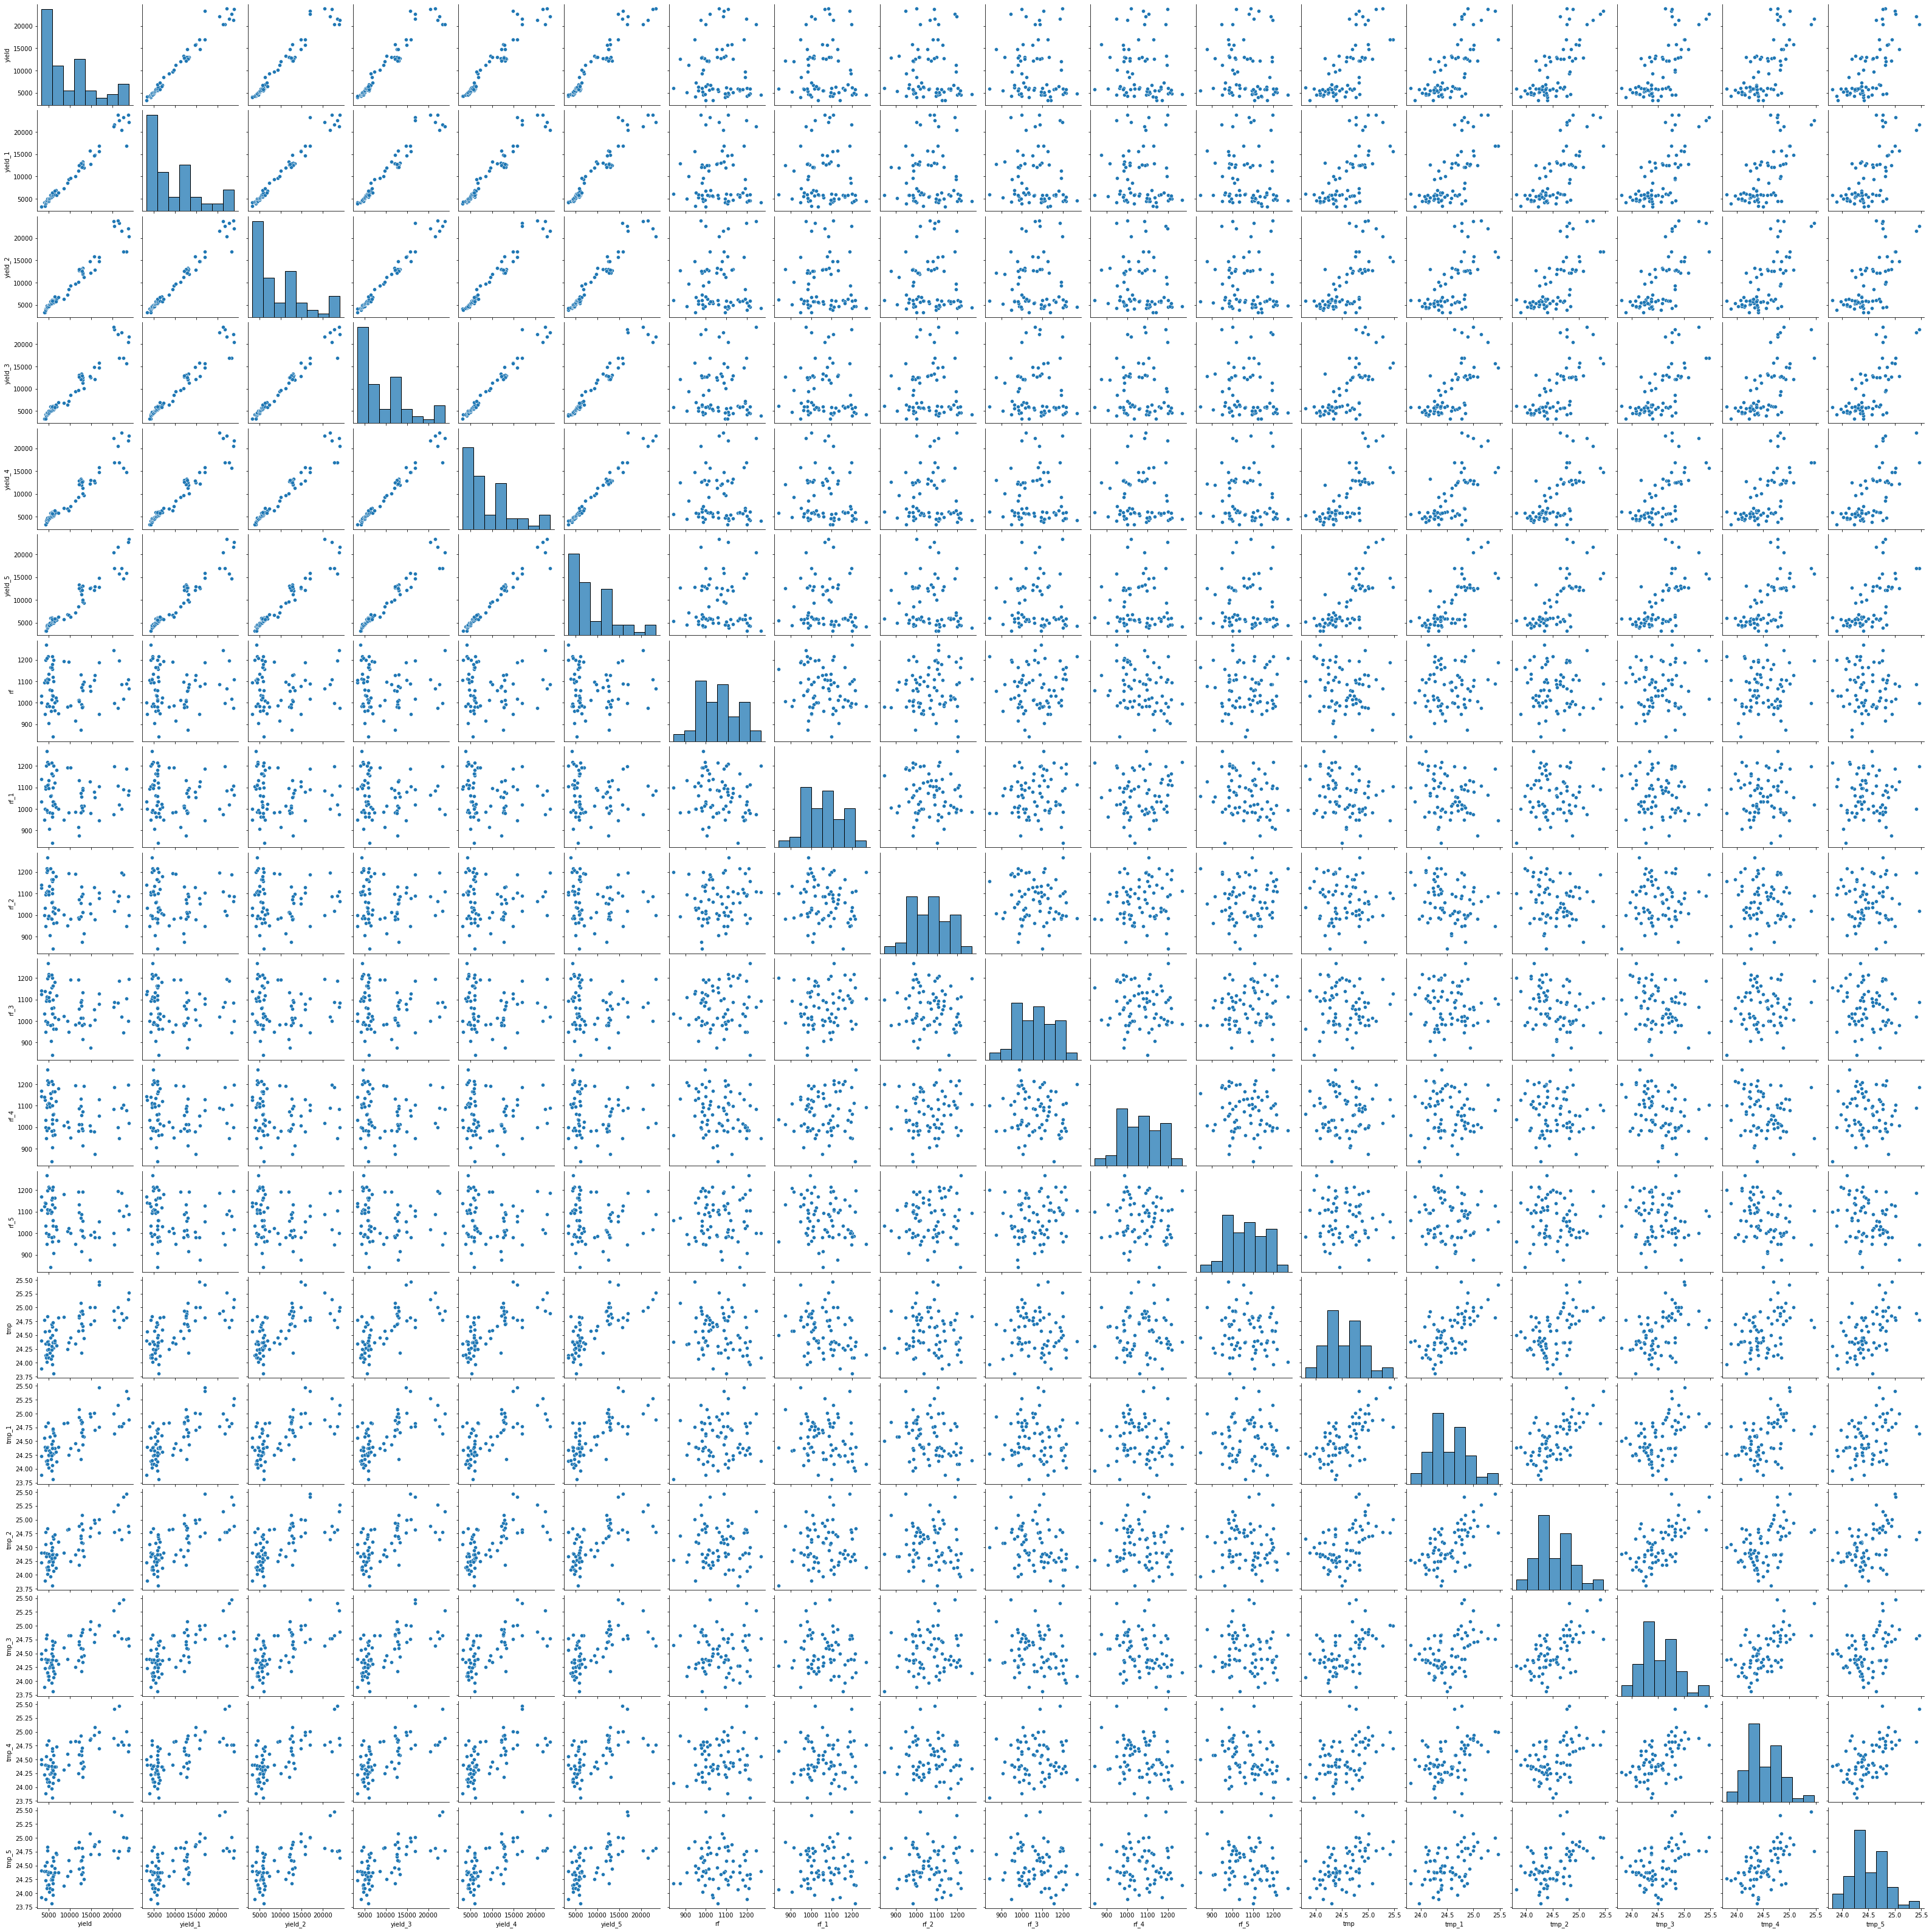

In [34]:
import seaborn as sns
sns.pairplot(final_df.iloc[:, 1:])

In [35]:
final_df.iloc[:, 1:].corr(method='pearson', min_periods=1)

,yield,yield_1,yield_2,yield_3,yield_4,yield_5,rf,rf_1,rf_2,rf_3,rf_4,rf_5,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
yield,1.000000,0.984849,0.968603,0.959887,0.959016,0.953547,-0.001354,-0.055193,-0.083430,-0.104338,-0.125482,-0.133664,0.693602,0.712387,0.722434,0.688577,0.674069,0.692128
yield_1,0.984849,1.000000,0.984493,0.971147,0.964128,0.961290,-0.000733,-0.052273,-0.031955,-0.097670,-0.106584,-0.133378,0.679825,0.687094,0.703780,0.709659,0.671748,0.666170
yield_2,0.968603,0.984493,1.000000,0.985604,0.972859,0.963876,0.002116,-0.058721,-0.025992,-0.047239,-0.100768,-0.116019,0.664507,0.673452,0.677589,0.688469,0.690826,0.664171
yield_3,0.959887,0.971147,0.985604,1.000000,0.984330,0.970142,-0.048817,-0.072498,-0.025348,-0.046343,-0.050230,-0.114319,0.689961,0.660994,0.665046,0.658776,0.662568,0.687394
yield_4,0.959016,0.964128,0.972859,0.984330,1.000000,0.982847,-0.025624,-0.133873,-0.036987,-0.047193,-0.050228,-0.062862,0.737137,0.689978,0.653198,0.644781,0.628863,0.659320
yield_5,0.953547,0.961290,0.963876,0.970142,0.982847,1.000000,-0.036356,-0.103870,-0.102655,-0.057689,-0.050558,-0.062488,0.740404,0.737851,0.682921,0.632266,0.614309,0.622368
rf,-0.001354,-0.000733,0.002116,-0.048817,-0.025624,-0.036356,1.000000,-0.128140,0.119433,0.049755,-0.219381,0.018698,-0.149577,0.106954,-0.043913,0.101492,0.065373,-0.072951
rf_1,-0.055193,-0.052273,-0.058721,-0.072498,-0.133873,-0.103870,-0.128140,1.000000,-0.095583,0.118484,0.064236,-0.224561,-0.290762,-0.195594,0.068567,-0.098358,0.039221,0.012651
rf_2,-0.083430,-0.031955,-0.025992,-0.025348,-0.036987,-0.102655,0.119433,-0.095583,1.000000,-0.080637,0.128660,0.071357,-0.054380,-0.285785,-0.183758,0.095067,-0.073481,0.038145
rf_3,-0.104338,-0.097670,-0.047239,-0.046343,-0.047193,-0.057689,0.049755,0.118484,-0.080637,1.000000,-0.065763,0.132015,0.000745,-0.072659,-0.301610,-0.200548,0.078844,-0.101265


In [36]:
final_df.shape

(70, 19)

In [37]:
final_df[['yield','tmp','tmp_1','tmp_2','tmp_3','tmp_4','tmp_5']].corr(method='pearson', min_periods=1)

,yield,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
yield,1.000000,0.693602,0.712387,0.722434,0.688577,0.674069,0.692128
tmp,0.693602,1.000000,0.631004,0.452359,0.483508,0.424154,0.518862
tmp_1,0.712387,0.631004,1.000000,0.624113,0.436517,0.470251,0.424013
tmp_2,0.722434,0.452359,0.624113,1.000000,0.612020,0.416018,0.457629
tmp_3,0.688577,0.483508,0.436517,0.612020,1.000000,0.589922,0.392562
tmp_4,0.674069,0.424154,0.470251,0.416018,0.589922,1.000000,0.573975
tmp_5,0.692128,0.518862,0.424013,0.457629,0.392562,0.573975,1.000000


In [33]:
c = final_df.corr(method='pearson', min_periods=1).abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[:100]

rf       yield_1    0.000733
yield_1  rf         0.000733
tmp      rf_3       0.000745
rf_3     tmp        0.000745
rf       yield      0.001354
                      ...   
rf_3     tmp_4      0.078844
rf_2     rf_3       0.080637
rf_3     rf_2       0.080637
rf_5     tmp        0.081109
tmp      rf_5       0.081109
Length: 100, dtype: float64

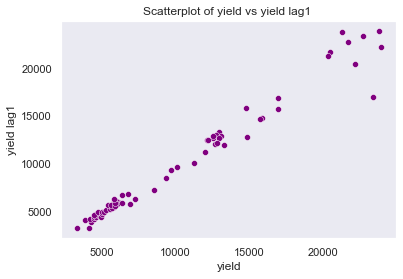

In [93]:
p1=sns.scatterplot(data=final_df, x="yield", y="yield_1",palette=['r'],color='purple')
p1.set(xlabel='yield', ylabel='yield lag1')
p1.set_title('Scatterplot of yield vs yield lag1 ')
plt.savefig('sc yield lag 0 1.png')

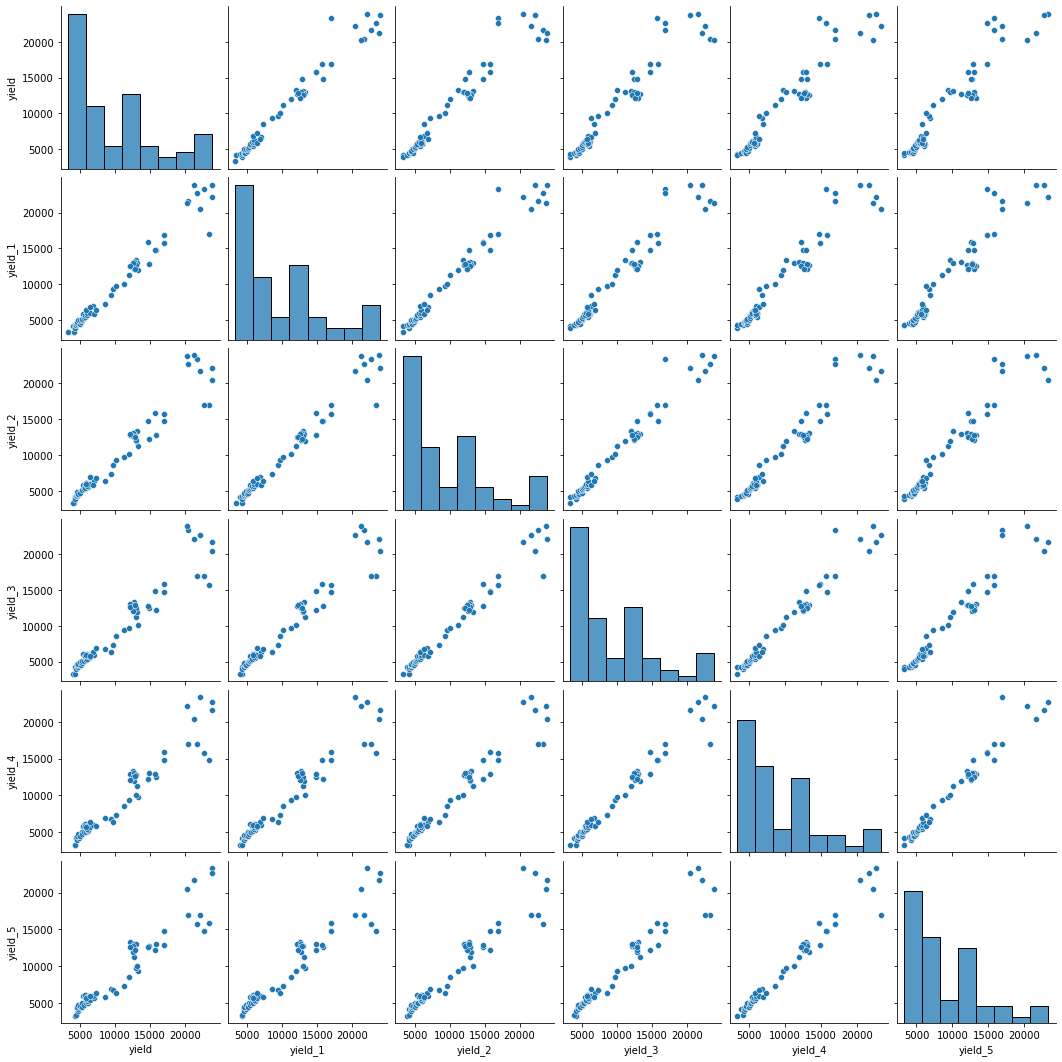

In [37]:
import seaborn as sns
sns.pairplot(final_df.iloc[:, 1:7])

### time series plot for yield variables

In [38]:
import seaborn as sns
### create stacked columns
yl_st = pd.DataFrame(columns=[
    'year','yield','lag'
]) 

### append lag = 0
tm_df = final_df[['Year','yield']]
tm_df=tm_df.rename(columns={'Year':'year'})
tm_df['lag']='0'

yl_st=yl_st.append(tm_df,ignore_index=True)



In [39]:
### append lag = 1
tm_df = final_df[['Year','yield_1']]
tm_df=tm_df.rename(columns={'Year':'year','yield_1':'yield'})
tm_df['lag']='1'

yl_st=yl_st.append(tm_df,ignore_index=True)

In [40]:
yl_st

,year,yield,lag
0,1950.0,3281.70,0
1,1951.0,3306.40,0
2,1952.0,4177.10,0
3,1953.0,3910.50,0
4,1954.0,4264.60,0
...,...,...,...
135,2015.0,20439.60,1
136,2016.0,22167.45,1
137,2017.0,23904.10,1
138,2018.0,23798.23,1


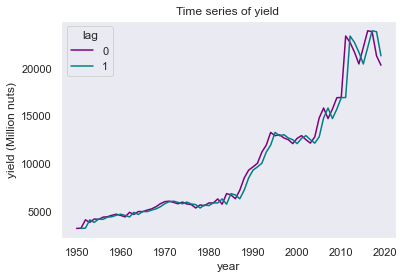

In [84]:
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

p1=sns.lineplot(x='year', y="yield",
             hue="lag", 
             palette=['purple','teal'],
             #style="event",
             data=yl_st
            
            )
p1.set(xlabel='year', ylabel='yield (Million nuts)')
p1.set_title('Time series of yield ')
plt.savefig('yield lag 0 1.png')

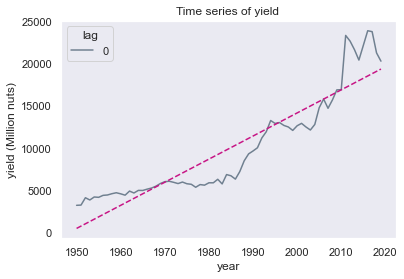

In [83]:
yl_st2 = yl_st[yl_st['lag']=='0']
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

p1=sns.lineplot(x='year', y="yield",
             hue="lag", 
             palette=['slategray'],
             #style="event",
             data=yl_st2
            
            )
p1.set(xlabel='year', ylabel='yield (Million nuts)')
p1.set_title('Time series of yield ')
#sns.set_xlabel("X-Axis", fontsize = 20)
#sns.set_ylabel("Y-Axis", fontsize = 20)


# Linear regressions for each sex
x = range(0, len(yl_st2['year']))
z = np.polyfit(x, yl_st2['yield'], 1)
p = np.poly1d(z)
plt.plot(yl_st2['year'], p(x), c="mediumvioletred", ls="--")


plt.savefig('yield lag o.png')

Text(0, 0.5, 'Y-Axis')

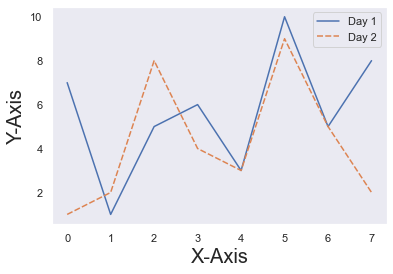

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"Day 1": [7,1,5,6,3,10,5,8],
                 "Day 2" : [1,2,8,4,3,9,5,2]})

p = sns.lineplot(data = df)
p.set_xlabel("X-Axis", fontsize = 20)
p.set_ylabel("Y-Axis", fontsize = 20)

### time series plot for temp and rf variables

In [41]:
### create stacked columns
tmp_st = pd.DataFrame(columns=[
    'year','temp','lag'
]) 

### append lag = 0
tm_df = final_df[['Year','tmp']]
tm_df=tm_df.rename(columns={'Year':'year','tmp':'temp'})
tm_df['lag']='0'

tmp_st=tmp_st.append(tm_df,ignore_index=True)

tmp_st

,year,temp,lag
0,1950.0,23.89,0
1,1951.0,24.40,0
2,1952.0,24.56,0
3,1953.0,24.77,0
4,1954.0,24.34,0
...,...,...,...
65,2015.0,24.89,0
66,2016.0,25.27,0
67,2017.0,25.15,0
68,2018.0,25.00,0


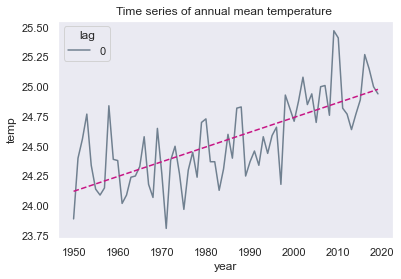

In [53]:
import numpy as np
sns.set_theme(style="dark")

#sns.color_palette("rocket")
sns.lineplot(x='year', y="temp",
             hue="lag", 
             palette=['slategray'],
             #style="event",
             data=tmp_st
            
            ).set_title('Time series of annual mean temperature ')

# Linear regressions for each sex
x = range(0, len(tmp_st['year']))
z = np.polyfit(x, tmp_st['temp'], 1)
p = np.poly1d(z)
plt.plot(tmp_st['year'], p(x), c="mediumvioletred", ls="--")


plt.savefig('annual mean temp.png')

### time series of annual rainfall

In [58]:
### create stacked columns
tmp_rf = pd.DataFrame(columns=[
    'year','rainfall','lag'
]) 

### append lag = 0
tm_df = final_df[['Year','rf']]
tm_df=tm_df.rename(columns={'Year':'year','rf':'rainfall'})
tm_df['lag']='0'

tmp_rf=tmp_rf.append(tm_df,ignore_index=True)

tmp_rf

,year,rainfall,lag
0,1950.0,1033.26,0
1,1951.0,1000.17,0
2,1952.0,948.96,0
3,1953.0,1093.76,0
4,1954.0,1105.82,0
...,...,...,...
65,2015.0,1085.10,0
66,2016.0,1065.11,0
67,2017.0,1108.30,0
68,2018.0,974.76,0


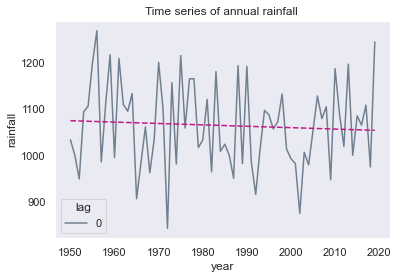

In [60]:
sns.set_theme(style="dark")

sns.lineplot(x='year', y="rainfall",
             hue="lag", 
             palette=['slategray'],
             #style="event",
             data=tmp_rf
            
            ).set_title('Time series of annual rainfall ')

# Linear regressions for each sex
x = range(0, len(tmp_rf['year']))
z = np.polyfit(x, tmp_rf['rainfall'], 1)
p = np.poly1d(z)
plt.plot(tmp_rf['year'], p(x), c="mediumvioletred", ls="--")


plt.savefig('annual rf.png')

### feature selection

In [41]:
final_df.columns

Index(['Year', 'yield', 'yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5',
       'rf', 'rf_1', 'rf_2', 'rf_3', 'rf_4', 'rf_5', 'tmp', 'tmp_1', 'tmp_2',
       'tmp_3', 'tmp_4', 'tmp_5'],
      dtype='object')

In [39]:
final_df.iloc[5:]

,Year,yield,yield_1,yield_2,yield_3,yield_4,yield_5,rf,rf_1,rf_2,rf_3,rf_4,rf_5,tmp,tmp_1,tmp_2,tmp_3,tmp_4,tmp_5
5,1955.0,4224.40,4264.60,3910.50,4177.10,3306.40,3281.70,1199.61,1105.82,1093.76,948.96,1000.17,1033.26,24.14,24.34,24.77,24.56,24.40,23.89
6,1956.0,4458.00,4224.40,4264.60,3910.50,4177.10,3306.40,1268.88,1199.61,1105.82,1093.76,948.96,1000.17,24.09,24.14,24.34,24.77,24.56,24.40
7,1957.0,4501.00,4458.00,4224.40,4264.60,3910.50,4177.10,985.78,1268.88,1199.61,1105.82,1093.76,948.96,24.15,24.09,24.14,24.34,24.77,24.56
8,1958.0,4651.70,4501.00,4458.00,4224.40,4264.60,3910.50,1112.08,985.78,1268.88,1199.61,1105.82,1093.76,24.84,24.15,24.09,24.14,24.34,24.77
9,1959.0,4765.40,4651.70,4501.00,4458.00,4224.40,4264.60,1216.78,1112.08,985.78,1268.88,1199.61,1105.82,24.39,24.84,24.15,24.09,24.14,24.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015.0,22167.45,20439.60,21665.19,22680.03,23351.22,16942.92,1085.10,999.89,1196.86,1018.89,1089.24,1187.09,24.89,24.77,24.64,24.77,24.82,25.41
66,2016.0,23904.10,22167.45,20439.60,21665.19,22680.03,23351.22,1065.11,1085.10,999.89,1196.86,1018.89,1089.24,25.27,24.89,24.77,24.64,24.77,24.82
67,2017.0,23798.23,23904.10,22167.45,20439.60,21665.19,22680.03,1108.30,1065.11,1085.10,999.89,1196.86,1018.89,25.15,25.27,24.89,24.77,24.64,24.77
68,2018.0,21288.24,23798.23,23904.10,22167.45,20439.60,21665.19,974.76,1108.30,1065.11,1085.10,999.89,1196.86,25.00,25.15,25.27,24.89,24.77,24.64


In [61]:
final_df['yield_1'].min()

3281.7

In [62]:
final_df['yield_1'].max()

23904.1

In [63]:
23904.1-3281.7

20622.399999999998

In [ ]:
std=(4264.60-3281.7)/(23904.1-3281.7)
X_scaled =std * (max - min) + min

In [42]:
X=final_df[['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5',
       'rf', 'rf_1', 'rf_2', 'rf_3', 'rf_4', 'rf_5', 'tmp', 'tmp_1', 'tmp_2',
       'tmp_3', 'tmp_4', 'tmp_5']].iloc[5:]

X=final_df[['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5',
        'rf_1', 'rf_2', 'rf_3', 'rf_4', 'rf_5', 'tmp_1', 'tmp_2',
       'tmp_3', 'tmp_4', 'tmp_5']].iloc[5:]

X=final_df[['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5',
         'tmp_1', 'tmp_2',
       'tmp_3', 'tmp_4', 'tmp_5']].iloc[5:]

x_col=X.columns

y=final_df['yield'].iloc[5:]
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

fit2 = SelectKBest(mutual_info_regression, k=10).fit_transform(X, y)


### feature scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [44]:
X

array([[0.00204271, 0.        , 0.01333427, 0.        , 0.        ,
        0.31927711, 0.57831325, 0.45180723, 0.35542169, 0.04819277],
       [0.        , 0.01771067, 0.        , 0.04343766, 0.00123072,
        0.19879518, 0.31927711, 0.57831325, 0.45180723, 0.35542169],
       [0.0118701 , 0.01570002, 0.01771067, 0.03013746, 0.04461492,
        0.1686747 , 0.19879518, 0.31927711, 0.57831325, 0.45180723],
       [0.01405509, 0.02738376, 0.01570002, 0.04780287, 0.03133109,
        0.20481928, 0.1686747 , 0.19879518, 0.31927711, 0.57831325],
       [0.02171273, 0.02953445, 0.02738376, 0.04579737, 0.04897476,
        0.62048193, 0.20481928, 0.1686747 , 0.19879518, 0.31927711],
       [0.02749026, 0.03707186, 0.02953445, 0.05745125, 0.04697173,
        0.34939759, 0.62048193, 0.20481928, 0.1686747 , 0.19879518],
       [0.02107248, 0.04275868, 0.03707186, 0.05959644, 0.05861127,
        0.34337349, 0.34939759, 0.62048193, 0.20481928, 0.1686747 ],
       [0.01290162, 0.03644166, 0.0427586

In [45]:
test = SelectKBest(mutual_info_regression, k=10)
fit = test.fit(X, y)

In [46]:
test.scores_

array([1.60960321, 1.51656632, 1.43920011, 1.43694277, 1.3729396 ,
       0.25855506, 0.24911963, 0.2959766 , 0.25235758, 0.22890616])

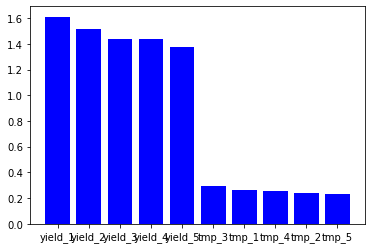

In [57]:
from matplotlib import pyplot as plt
import numpy as np

# Get the indices sorted by most important to least important
indices = np.argsort(test.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(10):
    features.append(x_col[indices[i]])

# Now plot
plt.figure()
plt.bar(features, fit.scores_[indices[range(10)]], color='b', align='center')
plt.show()

#### Evaluation Set - Not overlap with train or test sets

In [52]:
X.shape

(65, 10)

In [53]:
X_eval = X[-5:]

In [54]:
y_eval = y[-5:]

In [55]:
X=X[:-5]
y=y[:-5]

In [56]:
X.shape

(60, 10)

### model training

train test split 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

fit xgboost regression

In [59]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [60]:
#model.fit()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAPE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAPE: 0.058 (0.017)


In [69]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [65]:
from sklearn.svm import SVR
regr=SVR(C=1000, epsilon=0.2)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.11690761817750843

In [77]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model .fit(X_train, y_train)
y_pred=model .predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.053982764692812636